### LOAD DATA

In [1]:
# load training data
df_train <- read.csv("dataset/train.csv")
head(df_train, 3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500


In [2]:
# load testing data
df_test <- read.csv("dataset/test.csv")
head(df_test, 3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
2,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
3,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal


### EXPLORATORY ANALYSIS

In [3]:
# no. of rows and columns
dim(df_train)

[1] 1460   81

In [4]:
sum(is.na(df_train$FireplaceQu))

[1] 690

In [7]:
# missing values in each column
naCounts <- colSums(is.na(df_train))
sort(naCounts)

Id    MSSubClass      MSZoning       LotArea        Street 
            0             0             0             0             0 
     LotShape   LandContour     Utilities     LotConfig     LandSlope 
            0             0             0             0             0 
 Neighborhood    Condition1    Condition2      BldgType    HouseStyle 
            0             0             0             0             0 
  OverallQual   OverallCond     YearBuilt  YearRemodAdd     RoofStyle 
            0             0             0             0             0 
     RoofMatl   Exterior1st   Exterior2nd     ExterQual     ExterCond 
            0             0             0             0             0 
   Foundation    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF 
            0             0             0             0             0 
      Heating     HeatingQC    CentralAir     X1stFlrSF     X2ndFlrSF 
            0             0             0             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
            0             0             0             0             0 
   Functional    Fireplaces    GarageCars    GarageArea    PavedDrive 
            0             0             0             0             0 
   WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch   ScreenPorch 
            0             0             0             0             0 
     PoolArea       MiscVal        MoSold        YrSold      SaleType 
            0             0             0             0             0 
SaleCondition     SalePrice    Electrical    MasVnrType    MasVnrArea 
            0             0             1             8             8 
     BsmtQual      BsmtCond  BsmtFinType1  BsmtExposure  BsmtFinType2 
           37            37            37            38            38 
   GarageType   GarageYrBlt  GarageFinish    GarageQual    GarageCond 
           81            81            81            81            81 
  LotFrontage   FireplaceQu         Fence         Alley   MiscFeature 
          259           690          1179          1369          1406 
       PoolQC 
         1453

There are several ways to handle missing values in a data set:

**Drop the rows or columns with missing values:** This is the simplest approach, but it can be problematic if the missing values are a significant portion of the data set.

**Impute the missing values:** This means replacing the missing values with estimates based on the other values in the data set. There are many ways to impute missing values, such as using the mean, median, or mode of the non-missing values, or using a more advanced method such as linear regression or multiple imputation.

**Use a method that can handle missing values:** Some algorithms, such as decision trees and random forests, can handle missing values without preprocessing.

Which approach is best depends on the specific data set and the goals of the analysis. It is often a good idea to try multiple approaches and compare the results to see which one works best.

There is no one "correct" threshold for dropping columns with missing values. The appropriate threshold will depend on the specific data set and the goals of the analysis.

Here are a few things to consider when deciding whether to drop columns with missing values:

The size of the data set: If the data set is very large, you may be able to afford to drop more rows or columns without significantly affecting the overall analysis.

The importance of the column: If the column is important for the analysis, you may want to keep it even if it has a high percentage of missing values.

The number of missing values: If a column has a very high percentage of missing values (e.g., 90%), it may not be useful for the analysis, regardless of the size of the data set or the importance of the column.

Ultimately, the decision of whether to drop a column with missing values is a trade-off between the loss of information and the potential impact of the missing values on the analysis. It is up to you to decide what threshold is appropriate for your data set and analysis.

In [8]:
# percentage of missing values in each column in training dataset
p <- function(x) {sum(is.na(x))/length(x)*100}
sort(apply(df_train, 2, p)) # marmin = 2 means function will be applied in each column 

Id    MSSubClass      MSZoning       LotArea        Street 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
     LotShape   LandContour     Utilities     LotConfig     LandSlope 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
 Neighborhood    Condition1    Condition2      BldgType    HouseStyle 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
  OverallQual   OverallCond     YearBuilt  YearRemodAdd     RoofStyle 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
     RoofMatl   Exterior1st   Exterior2nd     ExterQual     ExterCond 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
   Foundation    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
      Heating     HeatingQC    CentralAir     X1stFlrSF     X2ndFlrSF 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
   Functional    Fireplaces    GarageCars    GarageArea    PavedDrive 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
   WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch   ScreenPorch 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
     PoolArea       MiscVal        MoSold        YrSold      SaleType 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
SaleCondition     SalePrice    Electrical    MasVnrType    MasVnrArea 
   0.00000000    0.00000000    0.06849315    0.54794521    0.54794521 
     BsmtQual      BsmtCond  BsmtFinType1  BsmtExposure  BsmtFinType2 
   2.53424658    2.53424658    2.53424658    2.60273973    2.60273973 
   GarageType   GarageYrBlt  GarageFinish    GarageQual    GarageCond 
   5.54794521    5.54794521    5.54794521    5.54794521    5.54794521 
  LotFrontage   FireplaceQu         Fence         Alley   MiscFeature 
  17.73972603   47.26027397   80.75342466   93.76712329   96.30136986 
       PoolQC 
  99.52054795

In [83]:
# percentage of missing values in each column in testing dataset
p <- function(x) {sum(is.na(x))/length(x)*100}
sort(apply(df_test, 2, p)) # marmin = 2 means function will be applied in each column 

Id    MSSubClass       LotArea        Street      LotShape 
    0.0000000     0.0000000     0.0000000     0.0000000     0.0000000 
  LandContour     LotConfig     LandSlope  Neighborhood    Condition1 
    0.0000000     0.0000000     0.0000000     0.0000000     0.0000000 
   Condition2      BldgType    HouseStyle   OverallQual   OverallCond 
    0.0000000     0.0000000     0.0000000     0.0000000     0.0000000 
    YearBuilt  YearRemodAdd     RoofStyle      RoofMatl     ExterQual 
    0.0000000     0.0000000     0.0000000     0.0000000     0.0000000 
    ExterCond    Foundation       Heating     HeatingQC    CentralAir 
    0.0000000     0.0000000     0.0000000     0.0000000     0.0000000 
   Electrical     X1stFlrSF     X2ndFlrSF  LowQualFinSF     GrLivArea 
    0.0000000     0.0000000     0.0000000     0.0000000     0.0000000 
     FullBath      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd 
    0.0000000     0.0000000     0.0000000     0.0000000     0.0000000 
   Fireplaces    PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch 
    0.0000000     0.0000000     0.0000000     0.0000000     0.0000000 
   X3SsnPorch   ScreenPorch      PoolArea       MiscVal        MoSold 
    0.0000000     0.0000000     0.0000000     0.0000000     0.0000000 
       YrSold SaleCondition   Exterior1st   Exterior2nd    BsmtFinSF1 
    0.0000000     0.0000000     0.0685401     0.0685401     0.0685401 
   BsmtFinSF2     BsmtUnfSF   TotalBsmtSF   KitchenQual    GarageCars 
    0.0685401     0.0685401     0.0685401     0.0685401     0.0685401 
   GarageArea      SaleType     Utilities  BsmtFullBath  BsmtHalfBath 
    0.0685401     0.0685401     0.1370802     0.1370802     0.1370802 
   Functional      MSZoning    MasVnrArea    MasVnrType  BsmtFinType1 
    0.1370802     0.2741604     1.0281014     1.0966415     2.8786840 
 BsmtFinType2      BsmtQual  BsmtExposure      BsmtCond    GarageType 
    2.8786840     3.0157642     3.0157642     3.0843043     5.2090473 
  GarageYrBlt  GarageFinish    GarageQual    GarageCond   LotFrontage 
    5.3461275     5.3461275     5.3461275     5.3461275    15.5586018 
  FireplaceQu         Fence         Alley   MiscFeature        PoolQC 
   50.0342700    80.1233722    92.6662097    96.5044551    99.7943797

In [62]:
# count numerical features
sum(sapply(df_train, is.numeric))

[1] 38

In [63]:
# count categorical features
sum(sapply(df_train, is.character))

[1] 43

In [64]:
str(df_train)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


In [68]:
# unique value counts per column
for(col in names(df_train)){
    unique_values <- length(unique(df_train[,col]))
    print(paste(col,":", unique_values))
}

[1] "Id : 1460"
[1] "MSSubClass : 15"
[1] "MSZoning : 5"
[1] "LotFrontage : 111"
[1] "LotArea : 1073"
[1] "Street : 2"
[1] "Alley : 3"
[1] "LotShape : 4"
[1] "LandContour : 4"
[1] "Utilities : 2"
[1] "LotConfig : 5"
[1] "LandSlope : 3"
[1] "Neighborhood : 25"
[1] "Condition1 : 9"
[1] "Condition2 : 8"
[1] "BldgType : 5"
[1] "HouseStyle : 8"
[1] "OverallQual : 10"
[1] "OverallCond : 9"
[1] "YearBuilt : 112"
[1] "YearRemodAdd : 61"
[1] "RoofStyle : 6"
[1] "RoofMatl : 8"
[1] "Exterior1st : 15"
[1] "Exterior2nd : 16"
[1] "MasVnrType : 5"
[1] "MasVnrArea : 328"
[1] "ExterQual : 4"
[1] "ExterCond : 5"
[1] "Foundation : 6"
[1] "BsmtQual : 5"
[1] "BsmtCond : 5"
[1] "BsmtExposure : 5"
[1] "BsmtFinType1 : 7"
[1] "BsmtFinSF1 : 637"
[1] "BsmtFinType2 : 7"
[1] "BsmtFinSF2 : 144"
[1] "BsmtUnfSF : 780"
[1] "TotalBsmtSF : 721"
[1] "Heating : 6"
[1] "HeatingQC : 5"
[1] "CentralAir : 2"
[1] "Electrical : 6"
[1] "X1stFlrSF : 753"
[1] "X2ndFlrSF : 417"
[1] "LowQualFinSF : 24"
[1] "GrLivArea : 861"
[1] "Bsm

In [69]:
# Function to display unique values of factor columns
display_unique_values <- function(df) {
  # Loop through each column of the dataframe
  for (col_name in names(df)) {
    # Check if the column is a factor
    if (is.character(df[, col_name])) {
        unique_values <- unique(df[, col_name])
        print(cat(col_name, ":", unique_values))
    }
  }
}

display_unique_values(df_train)

MSZoning : RL RM C (all) FV RHNULL
Street : Pave GrvlNULL
Alley : NA Grvl PaveNULL
LotShape : Reg IR1 IR2 IR3NULL
LandContour : Lvl Bnk Low HLSNULL
Utilities : AllPub NoSeWaNULL
LotConfig : Inside FR2 Corner CulDSac FR3NULL
LandSlope : Gtl Mod SevNULL
Neighborhood : CollgCr Veenker Crawfor NoRidge Mitchel Somerst NWAmes OldTown BrkSide Sawyer NridgHt NAmes SawyerW IDOTRR MeadowV Edwards Timber Gilbert StoneBr ClearCr NPkVill Blmngtn BrDale SWISU BluesteNULL
Condition1 : Norm Feedr PosN Artery RRAe RRNn RRAn PosA RRNeNULL
Condition2 : Norm Artery RRNn Feedr PosN PosA RRAn RRAeNULL
BldgType : 1Fam 2fmCon Duplex TwnhsE TwnhsNULL
HouseStyle : 2Story 1Story 1.5Fin 1.5Unf SFoyer SLvl 2.5Unf 2.5FinNULL
RoofStyle : Gable Hip Gambrel Mansard Flat ShedNULL
RoofMatl : CompShg WdShngl Metal WdShake Membran Tar&Grv Roll ClyTileNULL
Exterior1st : VinylSd MetalSd Wd Sdng HdBoard BrkFace WdShing CemntBd Plywood AsbShng Stucco BrkComm AsphShn Stone ImStucc CBlockNULL
Exterior2nd : VinylSd MetalSd Wd Sh

##### Correlation Heatmap

In [56]:
# df_train_numeric <- df_train_rm %>% select_if(is.numeric)
# 
# # calculate the correlation coeeficients
# correlation_matrix <- cor(df_train_numeric)
# 
# #melt the data frame
# library(reshape2)
# melted_cor <- melt(correlation_matrix)
# 
# library(corrplot)
# corrplot(correlation_matrix)# 

### Feature Engineering

Warning message in ggcorr(df_train, label = T, hjust = 1, layout.exp = 3):
"data in column(s) 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition' are not numeric and were ignored"


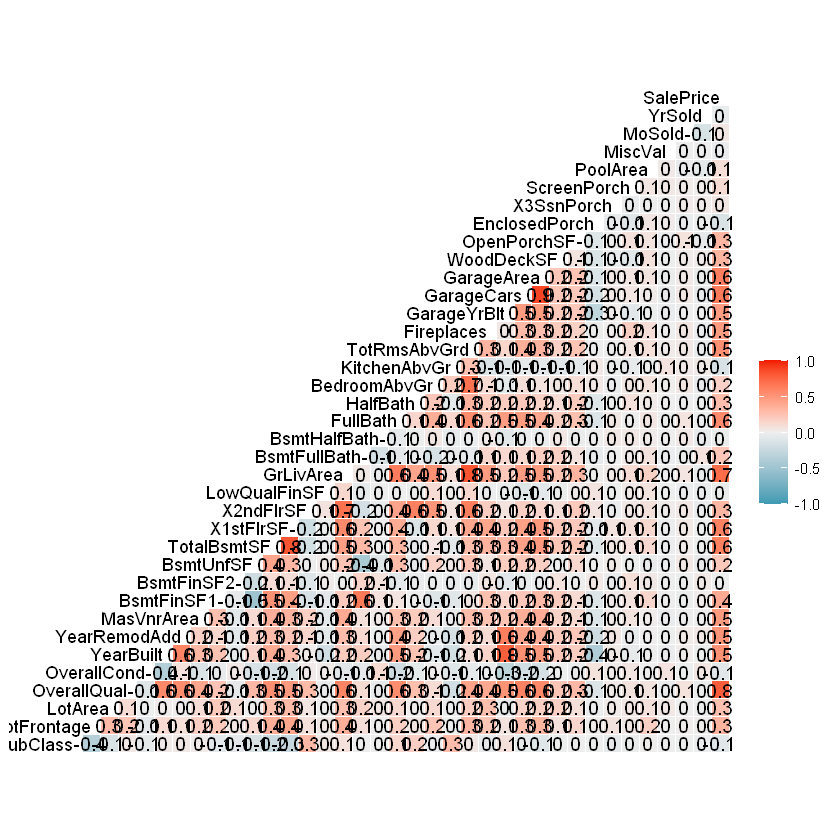

In [31]:
library(GGally)
ggcorr(df_train, label = T, hjust = 1, layout.exp = 3)

In [4]:
# drop the columns having over 80% na values
library(dplyr)
df_train <- dplyr::select(df_train, -c("Fence", "Alley", , "MiscFeature", "PoolQC"))

Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Removing rows where Target Variable is missing

In [5]:
target <- "SalePrice"
df_train <- df_train[complete.cases(df_train[target]), ]

In [6]:
# Removed 'ID' as it is not interesting since it is unique
df_train <- dplyr::select(df_train, -c("Id"))

In [7]:
dim(df_test)

[1] 1459   80

In [12]:
#replace NA values in all numeric columns with their respective medians
fill_with_median <- function(x) {
  median_x <- median(x, na.rm = TRUE)
  ifelse(is.na(x), median_x, x)
}

df_train[sapply(df_train, is.numeric)] <- lapply(df_train[sapply(df_train, is.numeric)], fill_with_median)

Warning message:
"package 'tidyr' was built under R version 4.1.3"


In [54]:
#replace NA values in all numeric columns with their respective medians in test set
df_test[sapply(df_test, is.numeric)] <- lapply(df_test[sapply(df_test, is.numeric)], fill_with_median)

In [74]:
# removing missing categorical values with "Missing" in trainging set
cat_cols <- sapply(df_train, is.character)
for (col in names(df_train)[cat_cols]) {
    df_train[col][is.na(df_train[col])] <- "Missing"
}

In [73]:
# removing missing categorical values with "Missing" in testing set
cat_cols <- sapply(df_test, is.character)
for (col in names(df_test)[cat_cols]) {
    df_test[col][is.na(df_test[col])] <- "Missing"
}

In [15]:
ncol(df_train)

[1] 76

In [75]:
# Function to display unique values of factor columns
display_unique_values <- function(df) {
  # Loop through each column of the dataframe
  for (col_name in names(df)) {
    # Check if the column is a factor
    if (is.character(df[, col_name])) {
        unique_values <- unique(df[, col_name])
        print(cat(col_name, ":", unique_values))
    }
  }
}

display_unique_values(df_train)

MSZoning : RL RM C (all) FV RHNULL
Street : Pave GrvlNULL
LotShape : Reg IR1 IR2 IR3NULL
LandContour : Lvl Bnk Low HLSNULL
Utilities : AllPub NoSeWaNULL
LotConfig : Inside FR2 Corner CulDSac FR3NULL
LandSlope : Gtl Mod SevNULL
Neighborhood : CollgCr Veenker Crawfor NoRidge Mitchel Somerst NWAmes OldTown BrkSide Sawyer NridgHt NAmes SawyerW IDOTRR MeadowV Edwards Timber Gilbert StoneBr ClearCr NPkVill Blmngtn BrDale SWISU BluesteNULL
Condition1 : Norm Feedr PosN Artery RRAe RRNn RRAn PosA RRNeNULL
Condition2 : Norm Artery RRNn Feedr PosN PosA RRAn RRAeNULL
BldgType : 1Fam 2fmCon Duplex TwnhsE TwnhsNULL
HouseStyle : 2Story 1Story 1.5Fin 1.5Unf SFoyer SLvl 2.5Unf 2.5FinNULL
RoofStyle : Gable Hip Gambrel Mansard Flat ShedNULL
RoofMatl : CompShg WdShngl Metal WdShake Membran Tar&Grv Roll ClyTileNULL
Exterior1st : VinylSd MetalSd Wd Sdng HdBoard BrkFace WdShing CemntBd Plywood AsbShng Stucco BrkComm AsphShn Stone ImStucc CBlockNULL
Exterior2nd : VinylSd MetalSd Wd Shng HdBoard Plywood Wd Sdn

In [57]:
sum(is.null(df_test$MSZoning))

[1] 0

### Modeling

In [77]:
library(randomForest)
model_train <- randomForest(SalePrice~., data=df_train, importance=TRUE)
model_train


Call:
 randomForest(formula = SalePrice ~ ., data = df_train, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 25

          Mean of squared residuals: 795040552
                    % Var explained: 87.39

In [59]:
# MSE
mserf <- model_train$mse[length(model_train$mse)]
mserf

[1] 811682660

In [78]:
# predict
predictions <- predict(model_train, newdata = df_test)

In [79]:
submission <- data.frame(
  Id = df_test$Id,
  SalePrice = predictions
)
solution <- as.data.frame(submission)

In [80]:
head(solution)

,Id,SalePrice
,<int>,<dbl>
1,1461,127328.1
2,1462,154111.4
3,1463,176414.2
4,1464,180720.7
5,1465,198359.1
6,1466,177161.2


In [82]:
write.csv(solution, file = "submission.csv", row.names = FALSE)

In [37]:
nrow(submission)

[1] 1459

In [81]:
sum(is.na(solution$SalePrice))

[1] 0

## Score: 0.15153